In [1]:
from langgraph.graph import Graph
from langgraph.graph import StateGraph

In [2]:
# langgraph -> orchestration -> pipeline

In [159]:
from langchain_groq import ChatGroq
import os

groq_api_key = os.getenv('GROQ_API_KEY')
llm = ChatGroq(groq_api_key=groq_api_key, model_name="llama-3.3-70b-versatile")

In [160]:
from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage
from typing import TypedDict, Annotated

In [ ]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [208]:
def LLM(state:State):
    print("----")
    print(state['messages'][0])
    print("----")
    input = state['messages'][0]
    llm = ChatGroq(groq_api_key=groq_api_key, model_name="llama-3.3-70b-versatile")
    response = llm.invoke(input).content
    return {"messages": [response]}

In [209]:
def Counter_Token(state:State):
    print("----")
    print(state['messages'][-1])
    print("----")
    text = state['messages'][-1]
    # token = text.split()
    # token_number = len(text)
    print("*********")
    print(text)
    print("*********")
    
    response = f"Total number of token in the generated output {2}"
    return {"messages": [response]}

In [210]:
workflow = StateGraph(State)

In [211]:
workflow.add_node("MY_LLM" ,LLM)
workflow.add_node("Token_Counter", Counter_Token)

In [212]:
workflow.add_edge("MY_LLM", "Token_Counter")

In [213]:
workflow.set_entry_point("MY_LLM")
workflow.set_finish_point("Token_Counter")

In [214]:
app = workflow.compile()

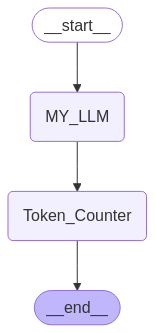

In [215]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [216]:
input = {"messages": ["What is agentic ai explain in very detailed manner"]}

app.invoke(input)

----
What is agentic ai explain in very detailed manner
----
----
content='Agentic AI refers to a type of artificial intelligence (AI) that possesses the ability to act autonomously, make decisions, and take actions on behalf of its users or owners. The term "agentic" is derived from the word "agent," which implies a sense of autonomy, self-directedness, and goal-oriented behavior.\n\n**Key Characteristics of Agentic AI:**\n\n1. **Autonomy**: Agentic AI systems have the ability to operate independently, making decisions and taking actions without direct human intervention.\n2. **Self-directedness**: Agentic AI systems are capable of setting their own goals, priorities, and objectives, which may or may not align with the goals of their human creators.\n3. **Goal-oriented behavior**: Agentic AI systems are designed to achieve specific objectives, which can be simple or complex, and may involve interacting with their environment, other agents, or humans.\n4. **Decision-making**: Agentic A

{'messages': [HumanMessage(content='What is agentic ai explain in very detailed manner', additional_kwargs={}, response_metadata={}, id='8d5f8a29-1941-43ba-bf91-c98be710a0e8'),
  HumanMessage(content='Agentic AI refers to a type of artificial intelligence (AI) that possesses the ability to act autonomously, make decisions, and take actions on behalf of its users or owners. The term "agentic" is derived from the word "agent," which implies a sense of autonomy, self-directedness, and goal-oriented behavior.\n\n**Key Characteristics of Agentic AI:**\n\n1. **Autonomy**: Agentic AI systems have the ability to operate independently, making decisions and taking actions without direct human intervention.\n2. **Self-directedness**: Agentic AI systems are capable of setting their own goals, priorities, and objectives, which may or may not align with the goals of their human creators.\n3. **Goal-oriented behavior**: Agentic AI systems are designed to achieve specific objectives, which can be simp

In [217]:
for output in app.stream(input):
    for key, value in output.items():
        print(f"here is output from {key}")
        print("----")
        print(value)
        print("\n")

----
What is agentic ai explain in very detailed manner
----
here is output from MY_LLM
----
{'messages': ['Agentic AI refers to a type of artificial intelligence (AI) that is designed to act autonomously, making decisions and taking actions on its own behalf, without direct human intervention. The term "agentic" comes from the word "agent," which refers to an entity that can act independently and make decisions based on its own goals, motivations, and preferences.\n\n**Key Characteristics of Agentic AI:**\n\n1. **Autonomy**: Agentic AI systems have the ability to operate independently, making decisions and taking actions without human intervention.\n2. **Goal-oriented**: Agentic AI systems are designed to achieve specific goals, which may be predefined or learned through experience.\n3. **Self-awareness**: Agentic AI systems have a sense of self and can reflect on their own internal state, including their goals, motivations, and preferences.\n4. **Decision-making**: Agentic AI systems

In [40]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [43]:
loader = DirectoryLoader("../data", glob="./*.txt", loader_cls=TextLoader)
docs = loader.load()
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=200
)
new_docs = text_splitter.split_documents(docs)
doc_string = [doc.page_content for doc in new_docs]

In [44]:
doc_string[0]

'Madam Speaker, Madam Vice President, our First Lady and Second Gentleman. Members of Congress and the Cabinet. Justices of the Supreme Court. My fellow Americans.  \n\nLast year COVID-19 kept us apart. This year we are finally together again. \n\nTonight, we meet as Democrats Republicans and Independents. But most importantly as Americans. \n\nWith a duty to one another to the American people to the Constitution. \n\nAnd with an unwavering resolve that freedom will always triumph over tyranny.'

In [45]:
from langchain_huggingface import  HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

c:\Users\sowmy\anaconda3\envs\langgraph\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [48]:
db = Chroma.from_documents(new_docs, embeddings)

retriever = db.as_retriever(search_kwargs={"k": 3})

In [49]:
query = ""

docs = retriever.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)

{'source': '..\\data\\state_of_the_union.txt'}
And soon, we’ll strengthen the Violence Against Women Act that I first wrote three decades ago. It is important for us to show the nation that we can come together and do big things. 

So tonight I’m offering a Unity Agenda for the Nation. Four big things we can do together.  

First, beat the opioid epidemic. 

There is so much we can do. Increase funding for prevention, treatment, harm reduction, and recovery.


C:\Users\sowmy\AppData\Local\Temp\ipykernel_16868\1705097344.py:3: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(query)


In [64]:
AgentState = {}

In [65]:
AgentState['messages'] = []

In [66]:
AgentState

{'messages': []}

In [67]:
AgentState['messages'].append("hi")

In [68]:
AgentState

{'messages': ['hi']}

In [69]:
AgentState['messages'].append("how are you?")

In [70]:
# we are flowing this state accross the different nodes inside the langgraph workflow

AgentState

{'messages': ['hi', 'how are you?']}

In [138]:
AgentState = {}
AgentState['messages'] = []

In [139]:
def function_1(AgentState):
    message = AgentState['messages']
    
    question = message[0]
    
    complete_prompt = "Your task is to provide only the brief answer based on the user query.\
        Don't include too much reasoing. Following is the user query: " + question
        
    response = llm.invoke(complete_prompt)
    
    AgentState['messages'].append(response.content)
    
    return AgentState

In [140]:
def function_2(AgentState):
    message = AgentState['messages']
    question = message[0]
    
    template = """Answer the question based only on the following context:
    {context}
    
    Question: {question}
    """
    
    prompt = ChatPromptTemplate.from_template(template)
    
    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt 
        | llm 
        | StrOutputParser()
    )
    
    result = retrieval_chain.invoke(question)
    return result

In [141]:
workflow = Graph()

workflow.add_node("LLM", function_1)
workflow.add_node("RAGtool", function_2)

workflow.add_edge("LLM", "RAGtool")

workflow.set_entry_point("LLM")
workflow.set_finish_point("RAGtool")

app2 = workflow.compile()

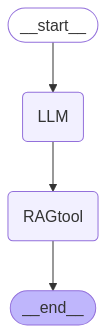

In [142]:
from IPython.display import Image, display

display(Image(app2.get_graph().draw_mermaid_png()))

In [143]:
app2.invoke({"messages": ["What is the meaning of 'cancer from prolonged exposure to burn pits ravaged Heath's lungs and body?"]})

'The provided context does not contain the sentence "cancer from prolonged exposure to burn pits ravaged Heath\'s lungs and body." Therefore, it is not possible to answer the question based on the given context. The context does discuss the issue of toxic exposures from burn pits and their effects on veterans, but it does not mention a specific individual named Heath.'

In [145]:
for output in app2.stream({"messages": ["What is the meaning of 'cancer from prolonged exposure to burn pits ravaged Heath's lungs and body?"]}):
    for key, value in output.items():
        print(f"here is output from {key}")
        print("_____")
        print(value)
        print("\n")

here is output from LLM
_____
{'messages': ["What is the meaning of 'cancer from prolonged exposure to burn pits ravaged Heath's lungs and body?", 'It means that Heath developed cancer due to long-term exposure to toxic fumes from burn pits, which severely damaged his lungs and overall body.']}


here is output from RAGtool
_____
The provided context does not mention 'Heath' or the specific phrase 'cancer from prolonged exposure to burn pits ravaged Heath's lungs and body.' It does, however, discuss the topic of burn pits and their toxic effects on veterans. According to the context, veterans who breathed in toxic smoke from burn pits in Iraq and Afghanistan experienced various health issues, including headaches, numbness, and dizziness. Additionally, it mentions that the president is expanding eligibility to veterans suffering from nine respiratory cancers. This implies that prolonged exposure to burn pits can lead to serious health problems, including respiratory cancers.


